# Задание 18

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [266]:
df = pd.read_csv("data/marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [268]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [269]:
df.dropna(inplace=True)

In [270]:
palette = "hls"

### Сделаем предварительную обработку датасета

<Axes: >

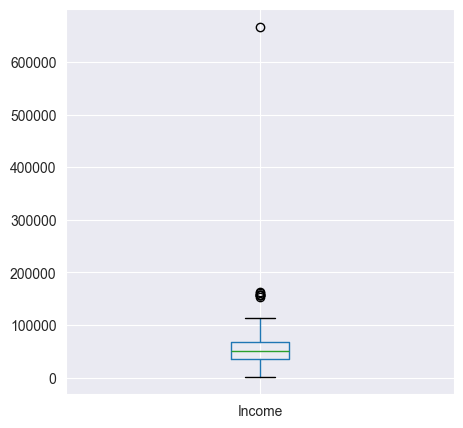

In [271]:
df.boxplot(column="Income", figsize=(5, 5))

boxplot выглядит очень плохо, поэтому есть смысл почистить его от выбросов

<Axes: >

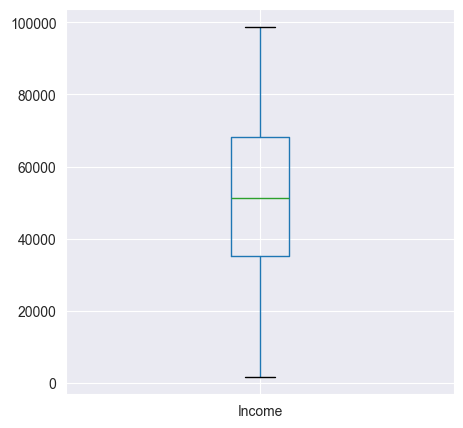

In [272]:
df = df[df["Income"] < 100000]
df.boxplot(column=["Income"], figsize=(5, 5))

Теперь удалим ненужные колонки

In [273]:
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

In [274]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,1968.804812,51512.049932,0.443032,0.507490,49.046754,305.584657,26.319564,165.364049,37.683159,26.864730,...,2.635497,5.810259,5.340899,0.073990,0.073082,0.071720,0.062642,0.013164,0.009532,0.149342
std,11.989173,20577.702498,0.537259,0.544407,28.939052,337.236335,39.663326,217.982657,54.751768,40.605385,...,2.789814,3.231085,2.412029,0.261814,0.260330,0.258083,0.242373,0.114002,0.097190,0.356506
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35187.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51250.000000,0.000000,0.000000,49.000000,177.000000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68134.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,98777.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,198.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### влияние семейного положения и возраста на доход

In [275]:
df.value_counts(subset="Marital_Status")

Marital_Status
Married     854
Together    567
Single      469
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Так как данных по Marital_Status "Alone", "Absurd", "YOLO" очень мало, то в дальнейшем мы не можем делать выводы о закономерностях в датасете людей с заданным Marital_Status

C:\Users\misha\AppData\Local\Temp\ipykernel_20288\739567486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], data=df, x="Marital_Status", y="Income", palette=palette)
C:\Users\misha\AppData\Local\Temp\ipykernel_20288\739567486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], data=df, x="Marital_Status", y="Income", palette=palette, estimator="median")


Text(0.5, 1.0, 'Медианное')

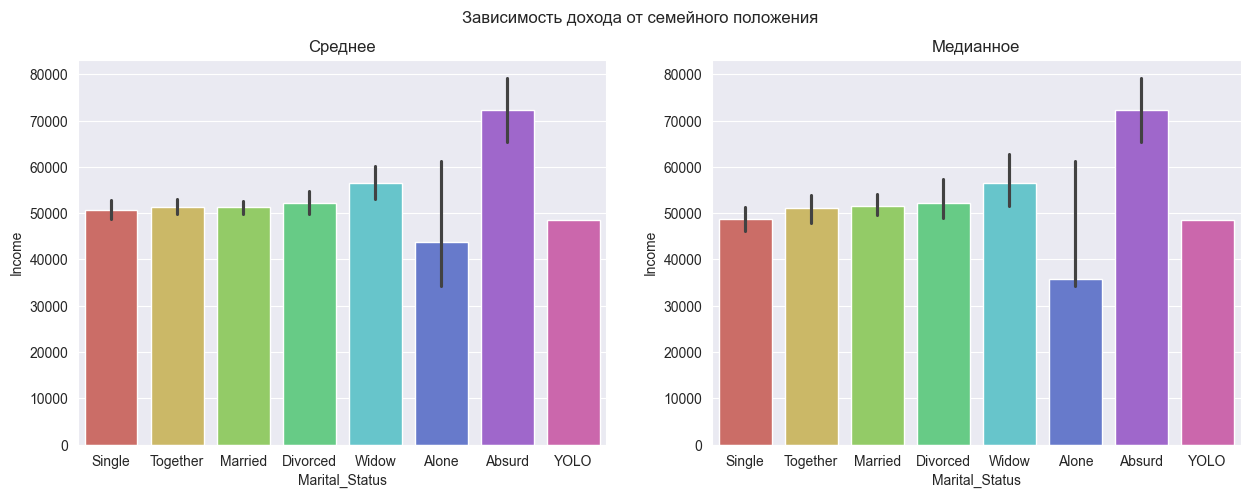

In [276]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Зависимость дохода от семейного положения")
sns.barplot(ax=ax[0], data=df, x="Marital_Status", y="Income", palette=palette)
ax[0].set_title("Среднее")
sns.barplot(ax=ax[1], data=df, x="Marital_Status", y="Income", palette=palette, estimator="median")
ax[1].set_title("Медианное")

- так как у нас мало данных по Alone, Absurd, YOLO, то и вывод по этим данным касательно данных групп делать не надо.
- Вдовы и вдовцы зарабатывают в среднем немного больше

In [277]:
def get_age_group(value):
    if 2023 - value >= 75:
        return "75+"
    if 2023 - value <= 35:
        return "25-35"
    return f"{(2023 - value) // 5 * 5}-{(2023 - value) // 5 * 5 + 5}"

df["Age_Group"] = df["Year_Birth"].apply(get_age_group)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_Group
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,65-70
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,65-70
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,55-60
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,35-40
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,40-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,55-60
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,0,75+
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,40-45
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,65-70


In [278]:
df.value_counts("Age_Group")

Age_Group
50-55    378
45-50    363
55-60    260
65-70    245
60-65    222
40-45    213
70-75    187
35-40    138
25-35    119
75+       78
Name: count, dtype: int64

Text(0.5, 1.0, 'Процентное соотношение возрастных групп')

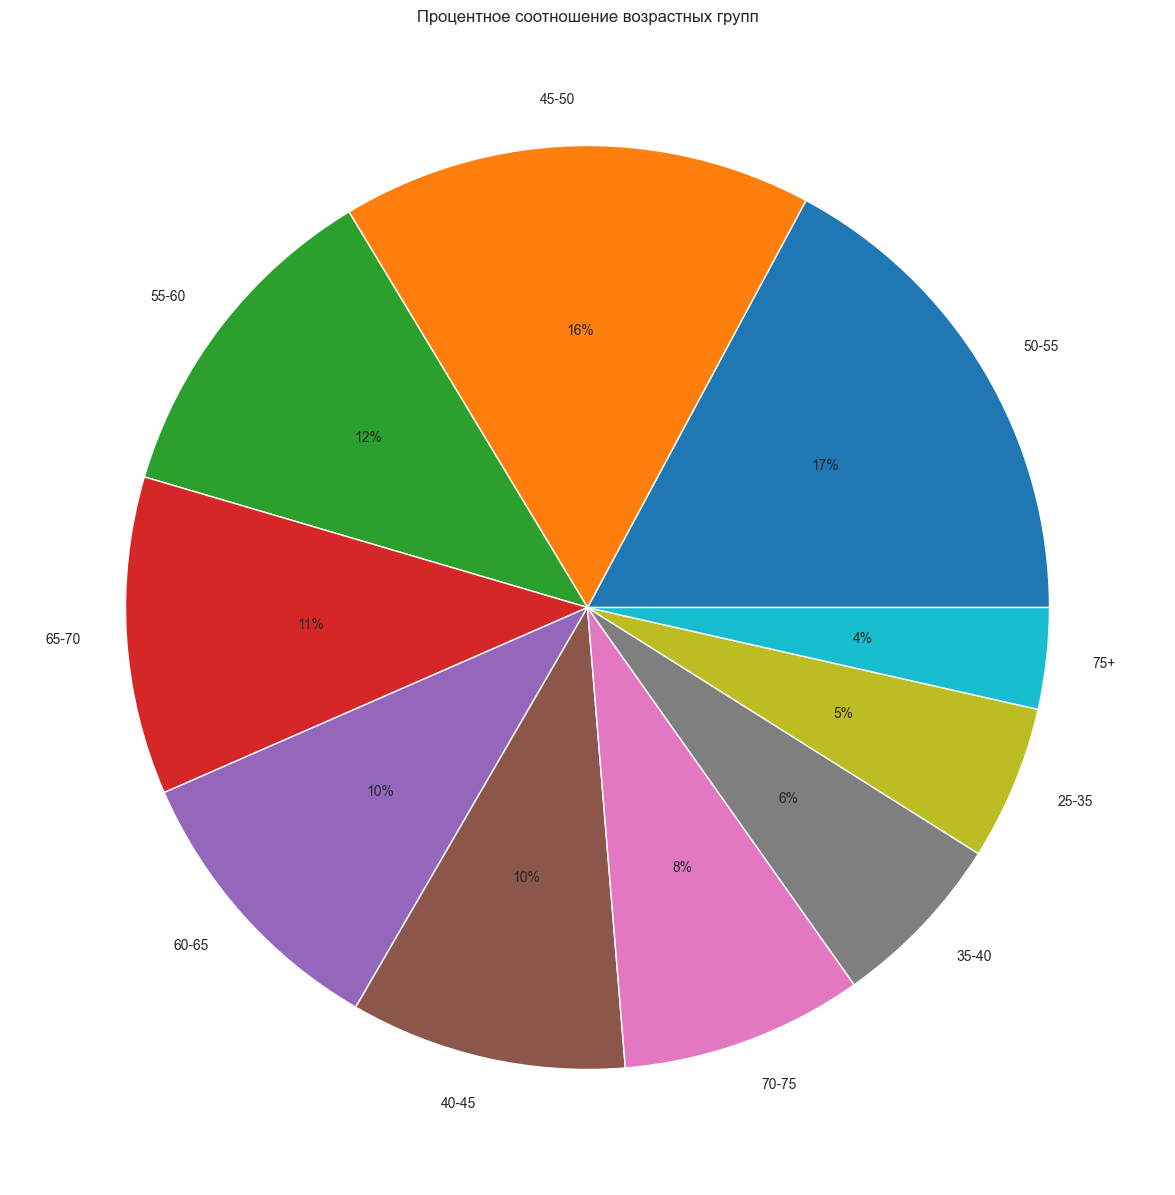

In [279]:
plt.pie(x=df.value_counts("Age_Group"), labels=df.value_counts("Age_Group").index, autopct="%.0f%%")
plt.title("Процентное соотношение возрастных групп")

C:\Users\misha\AppData\Local\Temp\ipykernel_20288\2528453102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], data=df.sort_values(by="Age_Group"), x="Age_Group", y="Income", palette=palette)
C:\Users\misha\AppData\Local\Temp\ipykernel_20288\2528453102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], data=df.sort_values(by="Age_Group"), x="Age_Group", y="Income", palette=palette, estimator="median")


Text(0.5, 1.0, 'Медианное')

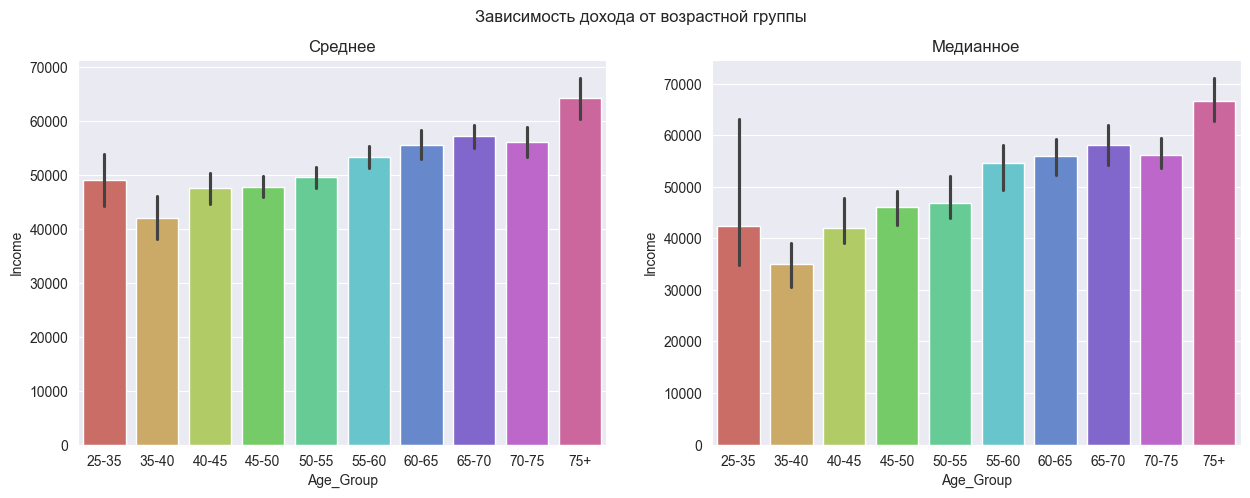

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Зависимость дохода от возрастной группы")
sns.barplot(ax=ax[0], data=df.sort_values(by="Age_Group"), x="Age_Group", y="Income", palette=palette)
ax[0].set_title("Среднее")
sns.barplot(ax=ax[1], data=df.sort_values(by="Age_Group"), x="Age_Group", y="Income", palette=palette, estimator="median")
ax[1].set_title("Медианное")

Чем старше человек, тем больше в среднем он зарабатывает

### Влияние детей на семейное положение и доход

C:\Users\misha\AppData\Local\Temp\ipykernel_20288\1566576311.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[0], data=df.sort_values(by="Kids_Count"), x="Kids_Count", y="Income", palette=palette)
C:\Users\misha\AppData\Local\Temp\ipykernel_20288\1566576311.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], data=df.sort_values(by="Kids_Count"), x="Kids_Count", y="Income", palette=palette, estimator="median")


Text(0.5, 1.0, 'Медианное')

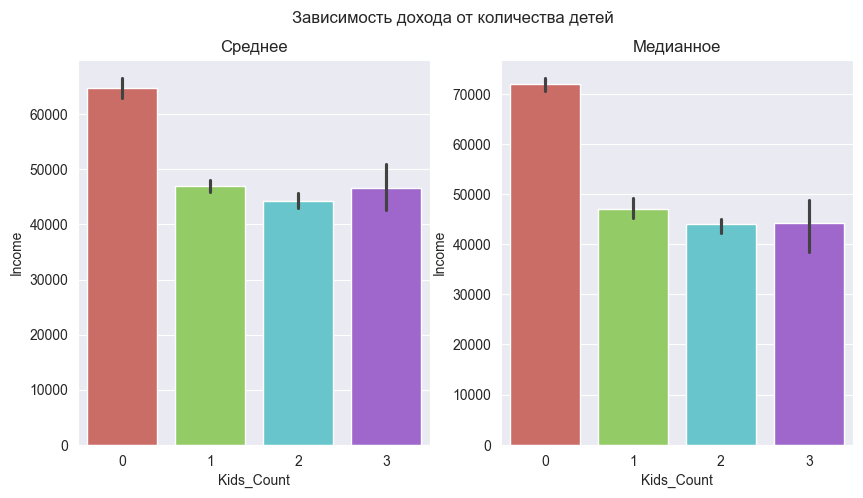

In [281]:
df["Kids_Count"] = df["Kidhome"] + df["Teenhome"]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Зависимость дохода от количества детей")
sns.barplot(ax=ax[0], data=df.sort_values(by="Kids_Count"), x="Kids_Count", y="Income", palette=palette)
ax[0].set_title("Среднее")
sns.barplot(ax=ax[1], data=df.sort_values(by="Kids_Count"), x="Kids_Count", y="Income", palette=palette, estimator="median")
ax[1].set_title("Медианное")

Человек, у которого нет детей в среднем зарабатывает больше

In [282]:
df.value_counts(subset="Kids_Count")

Kids_Count
1    1114
0     624
2     415
3      50
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1fcea0230a0>,
 [Text(-0.019607119701800797, 1.0998252410528682, '1'),
  Text(-0.6615719580081436, -0.8788188347875069, '0'),
  Text(0.8164438486537022, -0.7371698867937638, '2'),
  Text(1.0972049470980143, -0.07836647282890713, '3')],
 [Text(-0.010694792564618616, 0.599904676937928, '51%'),
  Text(-0.3608574316408056, -0.4793557280659128, '28%'),
  Text(0.4453330083565648, -0.4020926655238712, '19%'),
  Text(0.5984754256898259, -0.042745348815767525, '2%')])

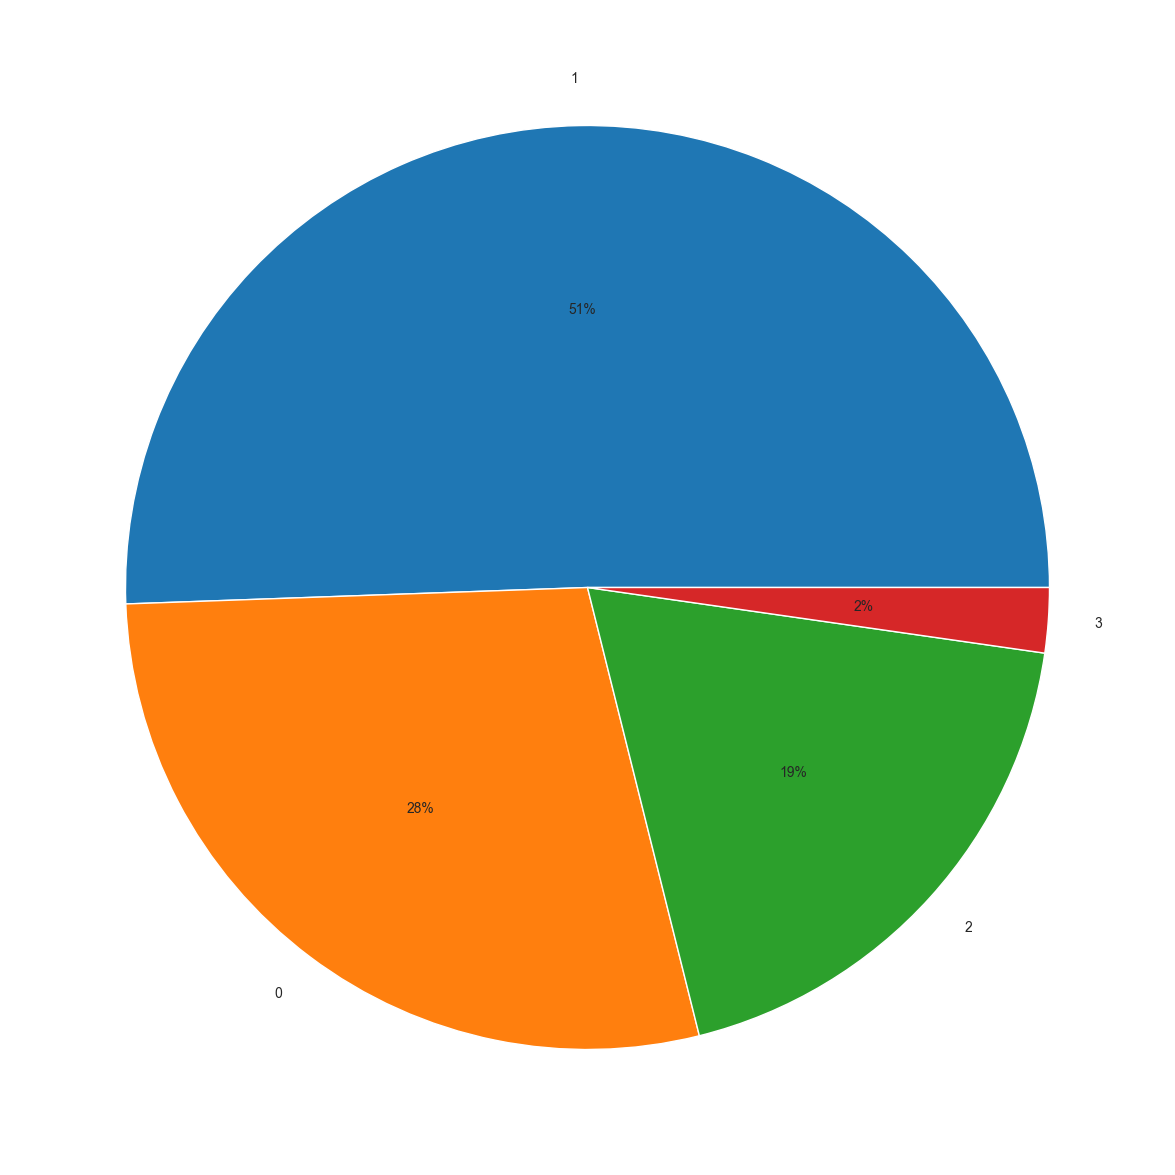

In [283]:
plt.pie(x=df.value_counts(subset="Kids_Count"), labels=df.value_counts(subset="Kids_Count").index, autopct="%.0f%%")

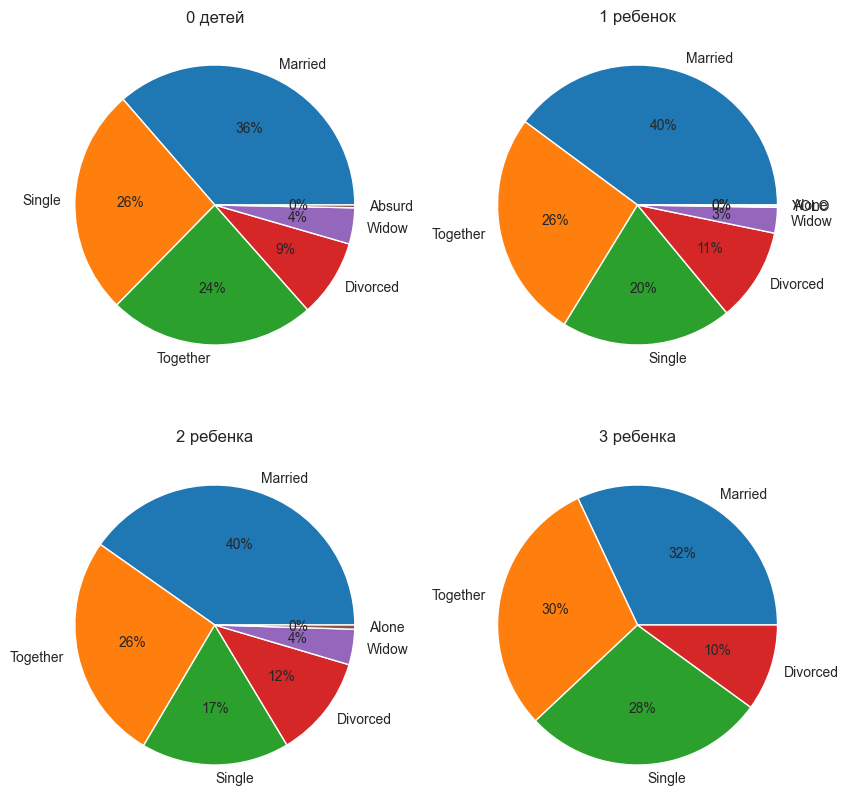

In [284]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pie(x=df[df["Kids_Count"] == 0].value_counts("Marital_Status"), labels=df[df["Kids_Count"] == 0].value_counts("Marital_Status").index, autopct="%.0f%%")
axs[0, 0].set_title('0 детей')
axs[0, 1].pie(x=df[df["Kids_Count"] == 1].value_counts("Marital_Status"), labels=df[df["Kids_Count"] == 1].value_counts("Marital_Status").index, autopct="%.0f%%")
axs[0, 1].set_title('1 ребенок')
axs[1, 0].pie(x=df[df["Kids_Count"] == 2].value_counts("Marital_Status"), labels=df[df["Kids_Count"] == 2].value_counts("Marital_Status").index, autopct="%.0f%%")
axs[1, 0].set_title('2 ребенка')
axs[1, 1].pie(x=df[df["Kids_Count"] == 3].value_counts("Marital_Status"), labels=df[df["Kids_Count"] == 3].value_counts("Marital_Status").index, autopct="%.0f%%")
axs[1, 1].set_title('3 ребенка')
fig.set_figwidth(10)
fig.set_figheight(10)

Что-то интересное, но я не вижу никаких закономерностей

### Как зависят траты на золото в зависимости от дохода

<Axes: xlabel='MntGoldProds', ylabel='Income'>

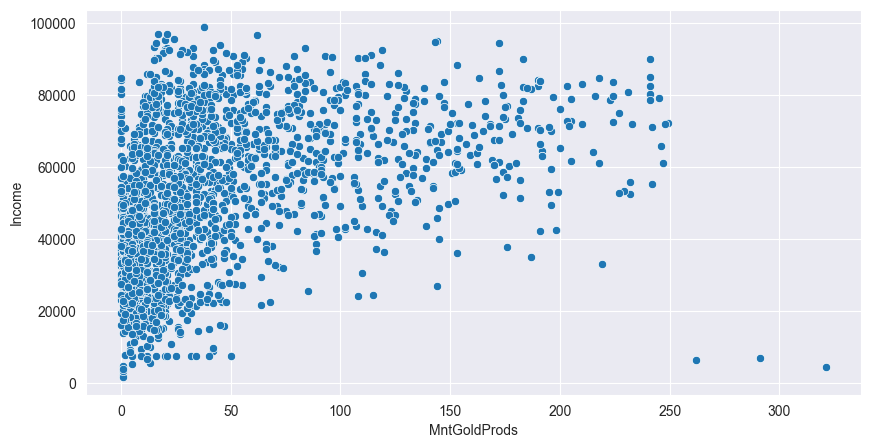

In [285]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(ax=ax, data=df, y="Income", x="MntGoldProds")

Чем больше человек покпает золота, тем он в среднем богаче

### Зависимость года рождения на кол-во покупок через сайт/напрямую из магазина

Text(0.5, 1.0, 'Зависимость кол-ва покупок напрямую в магазине от возраста')

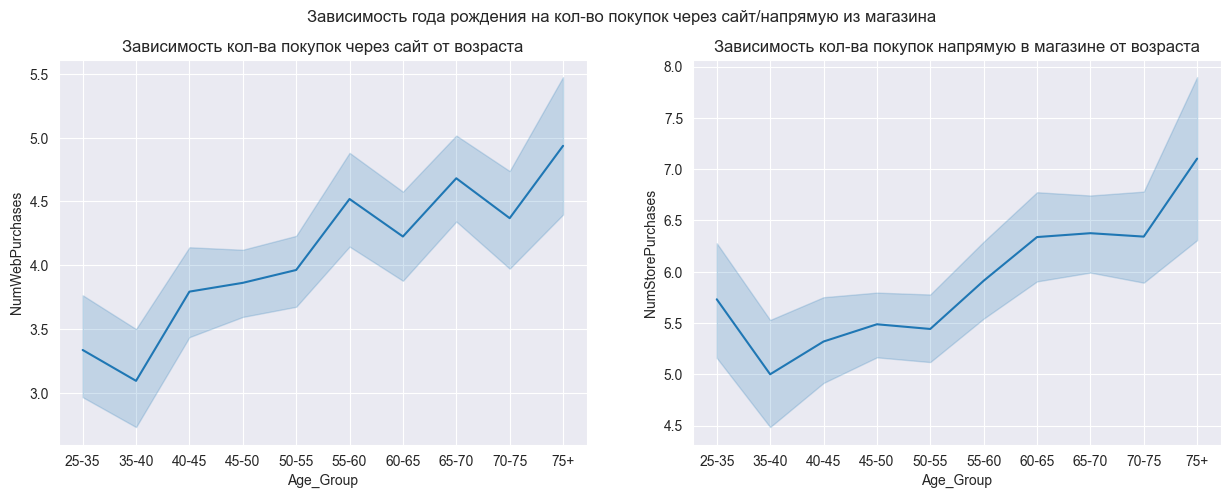

In [286]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Зависимость года рождения на кол-во покупок через сайт/напрямую из магазина")
sns.lineplot(ax=ax[0], data=df.sort_values(by="Age_Group"), x="Age_Group", y="NumWebPurchases")
ax[0].set_title("Зависимость кол-ва покупок через сайт от возраста")
sns.lineplot(ax=ax[1], data=df.sort_values(by="Age_Group"), x="Age_Group", y="NumStorePurchases")
ax[1].set_title("Зависимость кол-ва покупок напрямую в магазине от возраста")

Странно, но с увеличением возраста увеличается и кол-во покупок через сайт, и кол-во покупок напрямую

### Матрица корреляций

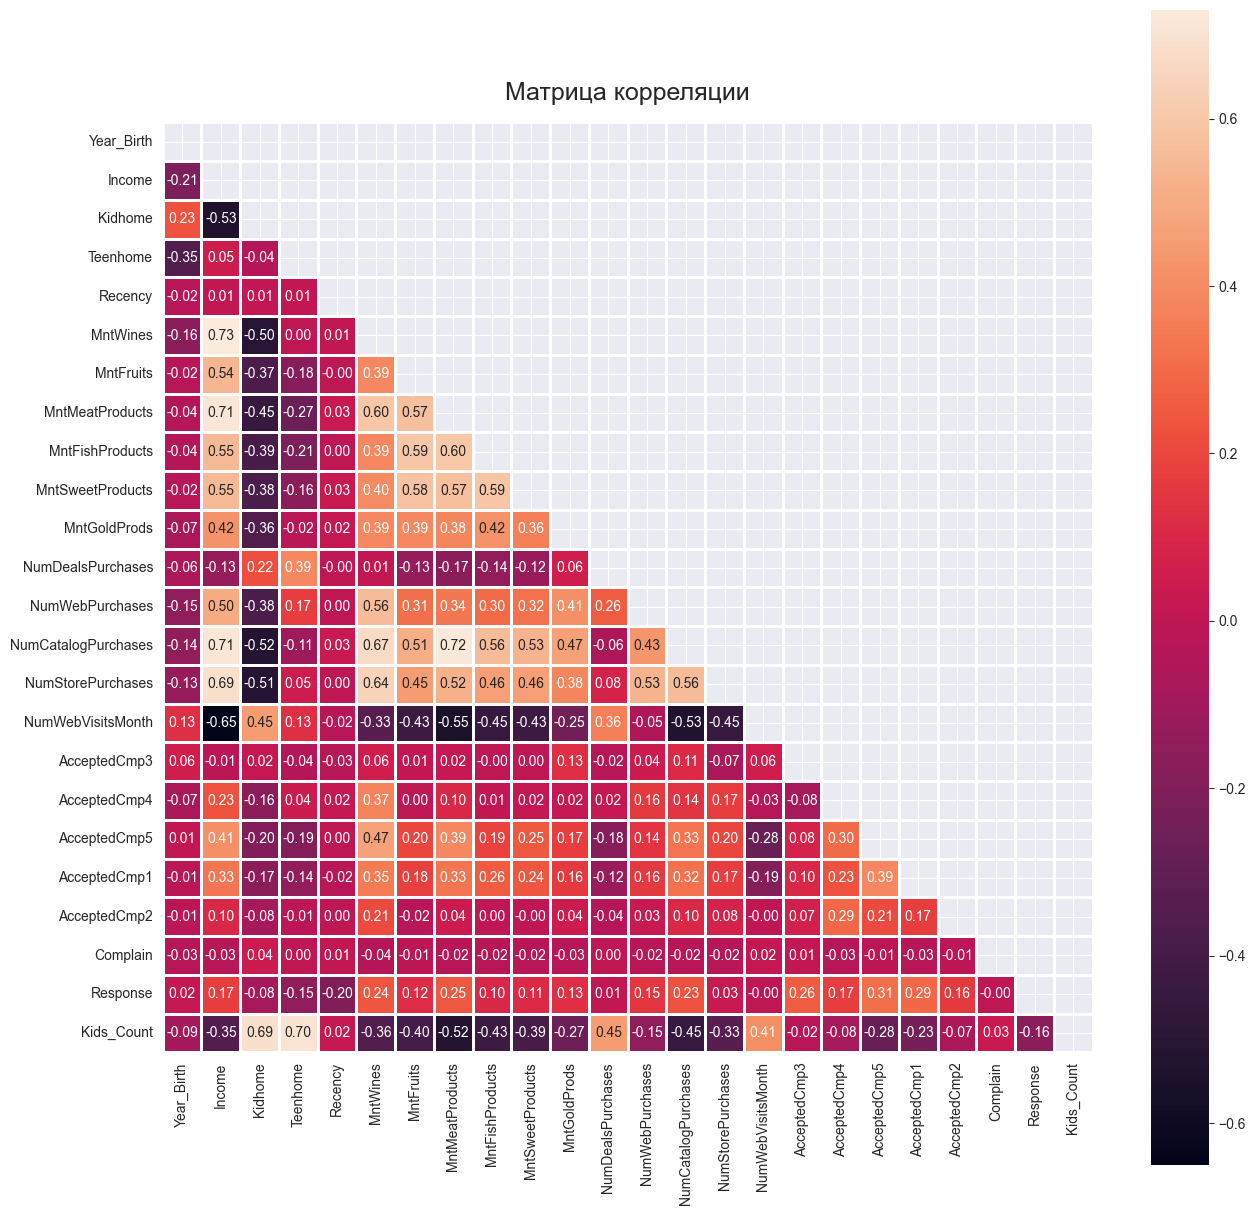

In [287]:
plt.rcParams["figure.figsize"] = (15, 15)

mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, fmt=".2f", mask=mask, linewidth=1, square=True)

heatmap.set_title(
    "Матрица корреляции", fontdict={"fontsize": 18}, pad=16
);

- Можно сделать вывод, что связаны между собой данные по покупкам различных товаров(начинаются с Mnt)
- чем больше доход, тем больше и покупок, и трат на вина, мясо и т.д.

# ML

In [288]:
import torch

Подготовим датасет

In [289]:
df.drop(columns="Age_Group", inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids_Count
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,2
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,1


In [290]:
for i in range(1, 7):
    if i == 6:
        df["Response"] = df["Response"] * (7 - i)
    else:
        df[f"AcceptedCmp{i}"] = df[f"AcceptedCmp{i}"] * (7 - i)
df["AcceptedCmpNum"] = (7 - df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].values.max(axis=1)) % 7
df.drop(columns=["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], inplace=True)

Выше создал колонку, где будет записан номер кампании, в которую покупатель впервые принял предложение

In [291]:
cat_features = ["Education", "Marital_Status"]
numeric_features = [
    "Year_Birth",
    "Income",
    "Kidhome", 
    "Teenhome",
    "Recency", 
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Kids_Count",
    "Dt_Customer",
]

cat_features далее преобразуем с помощью OneHotEncoding, а numeric_features нормализуем в отрезок [0;1]

In [292]:
encoded_df = pd.get_dummies(df, columns=["Education", "Marital_Status"], dtype=float)
encoded_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [293]:
encoded_df["Dt_Customer"] = pd.to_datetime(encoded_df["Dt_Customer"], format="%d-%m-%Y")
encoded_df["Dt_Customer"] = pd.to_numeric(encoded_df["Dt_Customer"]) / 86400000
encoded_df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,1.558700e+10,58,635,88,546,172,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1954,46344.0,1,1,1.613700e+10,38,11,1,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1965,71613.0,0,0,1.593800e+10,26,426,49,127,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1984,26646.0,1,0,1.611100e+10,26,11,4,20,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1981,58293.0,1,0,1.608900e+10,94,173,43,118,46,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,1.586900e+10,46,709,43,182,42,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,1946,64014.0,2,1,1.623100e+10,56,406,0,30,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,1981,56981.0,0,0,1.609500e+10,91,908,48,217,32,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,1956,69245.0,0,1,1.609400e+10,8,428,30,214,80,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [294]:
encoded_df[numeric_features] = (encoded_df[numeric_features] - encoded_df[numeric_features].min()) / (encoded_df[numeric_features].max() - encoded_df[numeric_features].min())
encoded_df

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.621359,0.581244,0.0,0.0,0.051502,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.459715,0.5,0.5,0.838340,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.720094,0.0,0.0,0.553648,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.256742,0.5,0.0,0.801144,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.582841,0.5,0.0,0.769671,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.718447,0.613033,0.0,0.5,0.454936,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.514563,0.641792,1.0,0.5,0.972818,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.854369,0.569322,0.0,0.0,0.778255,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.611650,0.695694,0.0,0.5,0.776824,0.080808,0.286671,0.150754,0.124058,0.308880,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Данные для обучения подготовлены, теперь нужно конвертировать dataframe'ы сначала в numpy-array, а потом в tensor в pytorch

In [295]:
X_np = encoded_df.drop(columns="AcceptedCmpNum").to_numpy()
y_np = encoded_df["AcceptedCmpNum"].to_numpy()
X_np

array([[0.62135922, 0.58124414, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59223301, 0.4597154 , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.69902913, 0.72009439, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.85436893, 0.56932208, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61165049, 0.69569384, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.59223301, 0.52695086, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [296]:
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X_np).type(torch.float32)
y = torch.from_numpy(y_np).type(torch.long)

разобьем весь датасет на тестовую часть и ту, на которой будем обучать нейросеть

In [297]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2
)

In [298]:
features_count = 32
classes_count = 7

In [299]:
class CustomersClassification(torch.nn.Module):
    def __init__(self, input_features, output_features, hidden_units=21):
        super().__init__()
        self.linear_layer_stack = torch.nn.Sequential(
            torch.nn.Linear(in_features=input_features, out_features=hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=hidden_units, out_features=hidden_units),
            torch.nn.ReLU(),
            torch.nn.Linear(in_features=hidden_units, out_features=output_features),
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)


model = CustomersClassification(
    input_features=features_count,
    output_features=classes_count,
    hidden_units=40,
)

In [300]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

Мною была использована метрика CrossEntropyLoss, так как она показывает, насколько хорошо работает классификация. 

In [301]:
def get_accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct / len(y_pred)) * 100 
    return accuracy

In [302]:
def learn_model(model, n_epochs, print_every_epoch=None):
    if not print_every_epoch:
        print_every_epoch = n_epochs // 10
    
    for epoch in range(n_epochs):
        model.train()
        
        y_logits = model(X_train)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        
        loss = loss_fn(y_logits, y_train)
        acc = get_accuracy(y_true=y_train, y_pred=y_pred)
        
        optimizer.zero_grad()
        loss.backward()
        # используем градиентный спуск
        
        optimizer.step()
        
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            
            test_loss = loss_fn(test_logits, y_test)
            test_acc = get_accuracy(y_true=y_test, y_pred=test_pred)
        if epoch % print_every_epoch == 0:
            print(f"Epoch: {epoch:3} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


learn_model(model, 75, print_every_epoch=1)

Epoch:   0 | Loss: 1.93756, Acc: 2.50% | Test Loss: 1.19186, Test Acc: 70.98%
Epoch:   1 | Loss: 1.15351, Acc: 73.16% | Test Loss: 3.57627, Test Acc: 70.98%
Epoch:   2 | Loss: 3.16813, Acc: 73.16% | Test Loss: 1.19578, Test Acc: 70.98%
Epoch:   3 | Loss: 1.08673, Acc: 73.16% | Test Loss: 1.46907, Test Acc: 70.98%
Epoch:   4 | Loss: 1.44826, Acc: 73.16% | Test Loss: 1.58232, Test Acc: 70.98%
Epoch:   5 | Loss: 1.56699, Acc: 73.16% | Test Loss: 1.56476, Test Acc: 70.98%
Epoch:   6 | Loss: 1.54898, Acc: 73.16% | Test Loss: 1.52423, Test Acc: 70.98%
Epoch:   7 | Loss: 1.50679, Acc: 73.16% | Test Loss: 1.46471, Test Acc: 70.98%
Epoch:   8 | Loss: 1.44473, Acc: 73.16% | Test Loss: 1.38747, Test Acc: 70.98%
Epoch:   9 | Loss: 1.36369, Acc: 73.16% | Test Loss: 1.29764, Test Acc: 70.98%
Epoch:  10 | Loss: 1.26868, Acc: 73.16% | Test Loss: 1.20336, Test Acc: 70.98%
Epoch:  11 | Loss: 1.16763, Acc: 73.16% | Test Loss: 1.12042, Test Acc: 70.98%
Epoch:  12 | Loss: 1.07624, Acc: 73.16% | Test Loss: 

Мною было выбрано 75 итераций обучения, так как далее Test Loss будет только увеличиваться